In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
def slide_over_image(img, kernel):
  windows = []
  kH, kW = kernel.shape
  for i in range(img.shape[0] - kH + 1):
    for j in range(img.shape[1] - kW + 1):
      window = np.array(img[i:i+kH, j:j+kW])
      windows.append(window)
  
  return windows



img = np.random.randint(0, 175, 64)
img = img.reshape(8, 8)
print(img)

kernel = np.ones((3, 3))
# Windows = slide_over_image(img, kernel)
# for window in Windows:
  # print(window)


[[ 19  96  20  23  48 166 117   7]
 [159  88 108 154 105 142 114 111]
 [147  85 102  39 163  31  44 110]
 [125  63   7 154 138  87 160  17]
 [115 120  35 163 120 155   5  89]
 [ 90  59   8 118  69  63  79 128]
 [ 52 171   3   2 128  29 170   2]
 [ 83  80 119  89 122  14  18 125]]


Text(0.5, 1.0, 'Image')

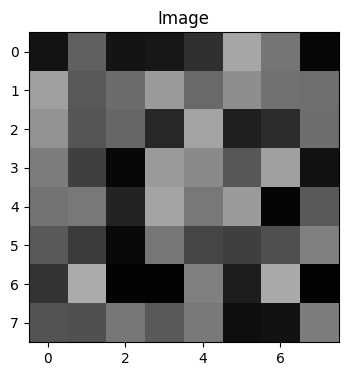

In [176]:
plt.figure(figsize=(4, 8))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Image")


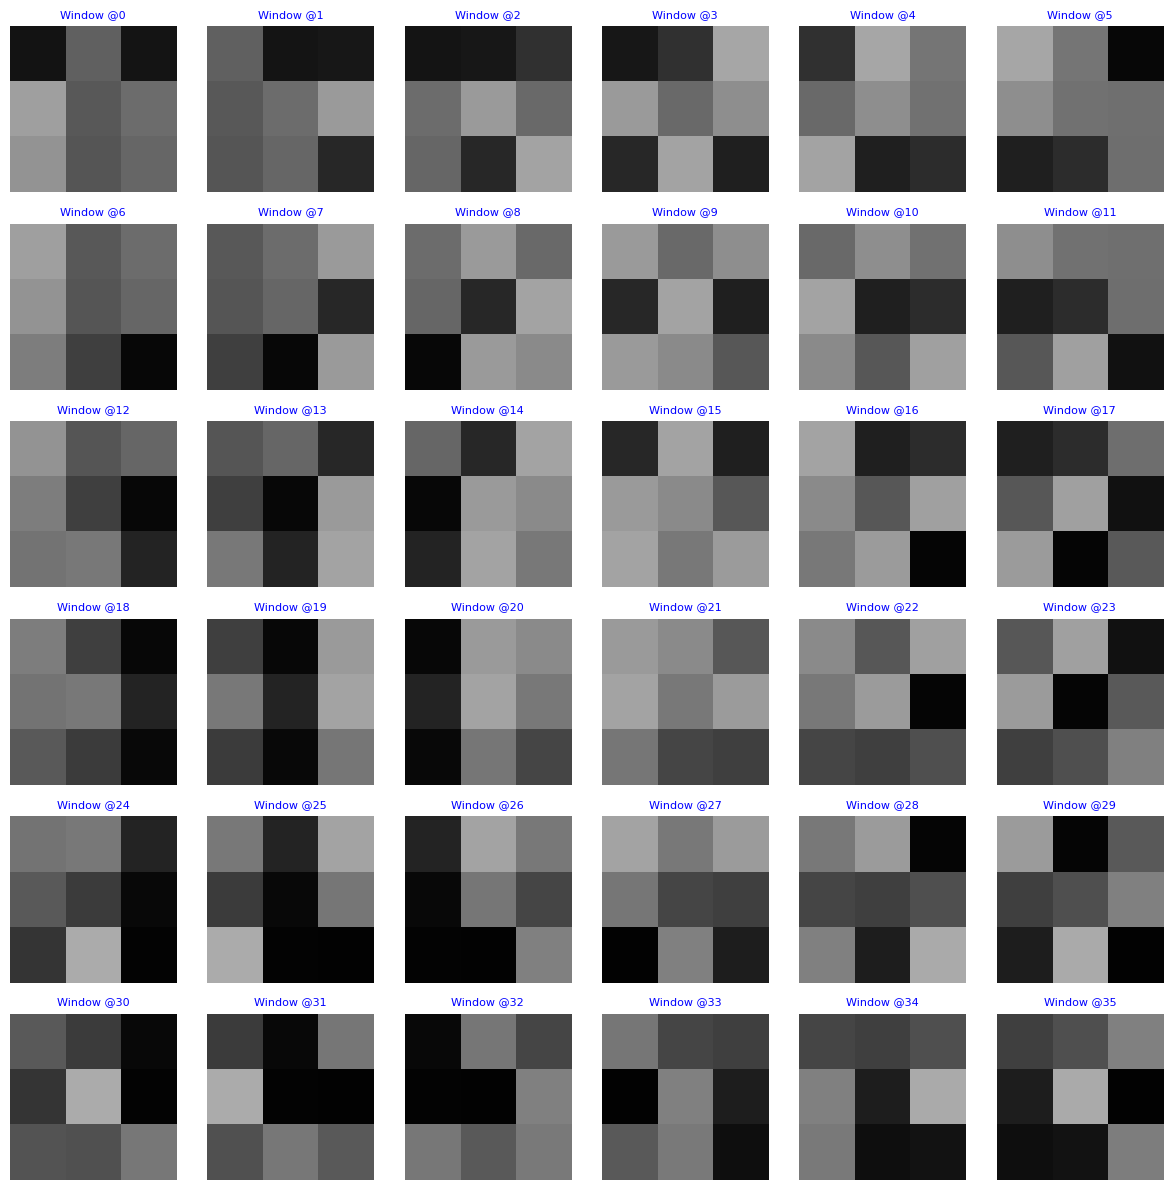

In [177]:
windows = slide_over_image(img, kernel)
n = len(windows)

cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))

plt.figure(figsize=(2 * cols, 2 * rows))
for i in range(n):
  plt.subplot(rows, cols, i + 1)
  plt.imshow(windows[i], cmap='gray', vmin=0, vmax=255)
  plt.title(f"Window @{i}", fontsize=8, color='blue')
  plt.axis('off')
  plt.grid()

plt.tight_layout()
plt.show()
  

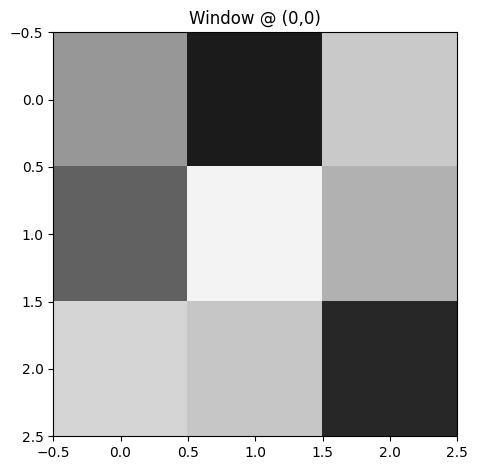

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a random 2D image (values from 0–255 for grayscale)
img = np.random.randint(0, 256, (6, 6))
kernel = np.ones((3, 3))  # Dummy kernel, not used for processing here

def slide_over_image(img, kernel):
    windows = []
    for i in range(img.shape[0] - kernel.shape[0] + 1):
        for j in range(img.shape[1] - kernel.shape[1] + 1):
            window = img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            windows.append(((i, j), window))
    return windows

windows = slide_over_image(img, kernel)

fig, ax = plt.subplots()
im = ax.imshow(np.zeros_like(kernel), cmap='gray', vmin=0, vmax=255)
title = ax.set_title("")

def update(frame):
    (i, j), window = windows[frame]
    im.set_data(window)
    title.set_text(f"Window @ ({i},{j})")
    return [im, title]

ani = animation.FuncAnimation(fig, update, frames=len(windows), interval=700, blit=True, repeat=False)

plt.tight_layout()
plt.show()
